In [2]:
# CARGAMOS LIBRERIAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import datetime

import boto3
import s3fs
import fastparquet
import awswrangler as wr
import os

import pyarrow.parquet as pq
import pyarrow as pa

import requests
import json
from io import BytesIO
from pandas.tseries.offsets import BDay

import math

In [4]:
# INICIALIZAMOS UNA SESION EN AWS
session = boto3.Session(
    aws_access_key_id=os.environ['S3_ACCESS_KEY'],
    aws_secret_access_key=os.environ['S3_SECRET_KEY'],
    region_name=os.environ['S3_REGION'])

s3_client = boto3.client('s3')

OBJETIVO DE ESTE NOTEBOOK:
- DESCARGAR DE DISTINTOS ORIGENES LOS DATOS DE LOS ACTIVOS DEL IBEX35
- COMPARAR LOS DATOS OBTENIDOS 

## CARGA DE COMPOSICIÓN HISTÓRICA DE IBEX35

In [5]:
# LEEMOS EL FICHERO CON LA COMPOSICIÓN HISTORICA
ibex_constituents = pd.read_excel('data_processing/Historical Composition IBEX35.xlsx')
ibex_constituents.head()

,Activo,Inclusion,Exclusion
0,ACE,1991-01-02,2003-06-02
1,ACX,1991-01-02,1991-07-01
2,ALB,1991-01-02,1991-07-01
3,ASL,1991-01-02,1994-01-03
4,BBV,1991-01-02,2000-01-31


In [6]:
# ibex_constituents['Exclusion'] -= BDay(1)

# ibex_constituents['Inclusion'] = ibex_constituents['Inclusion'].dt.date
# ibex_constituents['Exclusion'] = ibex_constituents['Exclusion'].dt.date

# OBTENEMOS EL DIA ACTUAL
today = datetime.date.today().strftime('%Y-%m-%d')

# COMPLETAMOS LOS DATOS NULOS EN EL FICHERO DE COMPOSICIÓN HISTORICA CON LA FECHA ACTUAL
ibex_constituents.fillna(today,inplace=True)

# DEFINIMOS UNA VARIABLE PARA TODOS LOS ACTIVOS
activos = ibex_constituents.Activo
ibex_constituents['Ticker'] = activos.apply(lambda x: x.split('_')[0])

unique_activos = list(set(activos))

### DESCARGAMOS LOS DATOS DE YAHOO FINANCE

In [56]:
# REALIZAMOS LA DESCARGA DE LOS DATOS DE YFINANCE Y LOS CARGAMOS EN UN BUCKET DE S3
bucket_name = 'stock-market-historical-data'
raw_folder = 'raw/yfinance/'
s3 = boto3.resource('s3')
failed_loads = []

for i in range(ibex_constituents.Ticker[i].unique):

    try:
        ticker = ibex_constituents.Ticker[i] + '.MC'
        file_name = ibex_constituents.Activo[i] +'.parquet'
        full_path = raw_folder + file_name
        
        stock = yf.download(ticker)
        stock = pd.DataFrame(stock)
        
        table = pa.Table.from_pandas(stock_data)
        buf = BytesIO()
        pq.write_table(table, buf)

        s3.Object(bucket_name, full_path).put(Body=buf.getvalue())
        print(ibex_constituents.Activo[i])
    except:
        failed_loads.append(ticker)
        continue



[*********************100%***********************]  1 of 1 completed


1 Failed download:
['ACE.MC']: Exception('%ticker%: 1d data not available for startTime=-2208994789 and endTime=1691562516. Only 100 years worth of day granularity data are allowed to be fetched per request.')



ACE
[*********************100%***********************]  1 of 1 completed
ACX
[*********************100%***********************]  1 of 1 completed
ALB
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['ASL.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



ASL
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['BBV.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



BBV
[*********************100%***********************]  1 of 1 completed
BKT
[*********************100%***********************]  1 of 1 completed
BTO
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['CEN.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



CEN
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['CEP.MC']: Exception('%ticker%: 1d data not available for startTime=-2208994789 and endTime=1691562520. Only 100 years worth of day granularity data are allowed to be fetched per request.')



CEP
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['CRI.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



CRI
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['CTG.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



CTG
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['DRC.MC']: Exception('%ticker%: 1d data not available for startTime=-2208994789 and endTime=1691562521. Only 100 years worth of day granularity data are allowed to be fetched per request.')



DRC
[*********************100%***********************]  1 of 1 completed
ECR
[*********************100%***********************]  1 of 1 completed
ELE
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['FEC.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



FEC
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['FOC.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



FOC
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['HID.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



HID
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['HIS.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



HIS
[*********************100%***********************]  1 of 1 completed
IBE
[*********************100%***********************]  1 of 1 completed
MAP
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['POP.MC']: Exception('%ticker%: 1d data not available for startTime=-2208994789 and endTime=1691562525. Only 100 years worth of day granularity data are allowed to be fetched per request.')



POP
[*********************100%***********************]  1 of 1 completed
REP
[*********************100%***********************]  1 of 1 completed
SAN
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['SEV.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



SEV
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['TAB.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



TAB
[*********************100%***********************]  1 of 1 completed
TEF
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['UNF.MC']: Exception('%ticker%: 1d data not available for startTime=-2208994789 and endTime=1691562528. Only 100 years worth of day granularity data are allowed to be fetched per request.')



UNF
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['URA.MC']: Exception('%ticker%: 1d data not available for startTime=-2208994789 and endTime=1691562528. Only 100 years worth of day granularity data are allowed to be fetched per request.')



URA
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['URB.MC']: Exception('%ticker%: 1d data not available for startTime=-2208994789 and endTime=1691562529. Only 100 years worth of day granularity data are allowed to be fetched per request.')



URB
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['VAL.MC']: Exception('%ticker%: 1d data not available for startTime=-2208994789 and endTime=1691562529. Only 100 years worth of day granularity data are allowed to be fetched per request.')



VAL
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['VDR.MC']: Exception('%ticker%: 1d data not available for startTime=-2208994789 and endTime=1691562529. Only 100 years worth of day granularity data are allowed to be fetched per request.')



VDR
[*********************100%***********************]  1 of 1 completed
VIS
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['AGR.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



AGR
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['CUB.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



CUB
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['HHU.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



HHU
[*********************100%***********************]  1 of 1 completed
MVC
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['CAN.MC']: Exception('%ticker%: 1d data not available for startTime=-2208994789 and endTime=1691562532. Only 100 years worth of day granularity data are allowed to be fetched per request.')



CAN
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['PMD.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



PMD
[*********************100%***********************]  1 of 1 completed
ALB_1
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['CRI.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



CRI_1
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['SAR.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



SAR
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['EXT.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



EXT
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['AGS.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



AGS
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['BCH.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



BCH
[*********************100%***********************]  1 of 1 completed
ACX_1
[*********************100%***********************]  1 of 1 completed
FCC
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['PRY.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



PRY
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['ARA.MC']: Exception('%ticker%: 1d data not available for startTime=-2208994789 and endTime=1691562537. Only 100 years worth of day granularity data are allowed to be fetched per request.')



ARA
[*********************100%***********************]  1 of 1 completed
ALB_2
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['AUM.MC']: Exception('%ticker%: 1d data not available for startTime=-2208994789 and endTime=1691562538. Only 100 years worth of day granularity data are allowed to be fetched per request.')



AUM
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['CEP.MC']: Exception('%ticker%: 1d data not available for startTime=-2208994789 and endTime=1691562538. Only 100 years worth of day granularity data are allowed to be fetched per request.')



CEP_1
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['HHU.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



HHU_1
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['AGS.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



AGS_1
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['ZOT.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



ZOT
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['ARG.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



ARG
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['EBA.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



EBA
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['GES.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



GES
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['CTE.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



CTE
[*********************100%***********************]  1 of 1 completed
ENC
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['CTF.MC']: Exception('%ticker%: 1d data not available for startTime=-2208994789 and endTime=1691562541. Only 100 years worth of day granularity data are allowed to be fetched per request.')



CTF
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['AGS.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



AGS_2
[*********************100%***********************]  1 of 1 completed
AMP
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['AZC.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



AZC
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['GES.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



GES_1
[*********************100%***********************]  1 of 1 completed
SOL
[*********************100%***********************]  1 of 1 completed
UNI
[*********************100%***********************]  1 of 1 completed
ANA
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['AZC.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



AZC_1
[*********************100%***********************]  1 of 1 completed
TUB
[*********************100%***********************]  1 of 1 completed
VIS_1
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['PUL.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



PUL
[*********************100%***********************]  1 of 1 completed
ACS
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['ACR.MC']: Exception('%ticker%: 1d data not available for startTime=-2208994789 and endTime=1691562547. Only 100 years worth of day granularity data are allowed to be fetched per request.')



ACR
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['TPZ.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



TPZ
[*********************100%***********************]  1 of 1 completed
ALB_3
[*********************100%***********************]  1 of 1 completed
ANA_1
[*********************100%***********************]  1 of 1 completed
NHH
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['SCH.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



SCH
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['RAD.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



RAD
[*********************100%***********************]  1 of 1 completed
FER
[*********************100%***********************]  1 of 1 completed
IDR
[*********************100%***********************]  1 of 1 completed
AMS
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['SGC.MC']: Exception('%ticker%: 1d data not available for startTime=-2208994789 and endTime=1691562552. Only 100 years worth of day granularity data are allowed to be fetched per request.')



SGC
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['TPI.MC']: Exception('%ticker%: 1d data not available for startTime=-2208994789 and endTime=1691562552. Only 100 years worth of day granularity data are allowed to be fetched per request.')



TPI
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['ALT.MC']: Exception('%ticker%: 1d data not available for startTime=-2208994789 and endTime=1691562552. Only 100 years worth of day granularity data are allowed to be fetched per request.')



ALT
[*********************100%***********************]  1 of 1 completed
BBVA
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['TRR.MC']: Exception('%ticker%: 1d data not available for startTime=-2208994789 and endTime=1691562553. Only 100 years worth of day granularity data are allowed to be fetched per request.')



TRR
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['REE.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



REE
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['ZEL.MC']: Exception('%ticker%: 1d data not available for startTime=-2208994789 and endTime=1691562554. Only 100 years worth of day granularity data are allowed to be fetched per request.')



ZEL
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['CRF.MC']: Exception('%ticker%: 1d data not available for startTime=-2208994789 and endTime=1691562554. Only 100 years worth of day granularity data are allowed to be fetched per request.')



CRF
[*********************100%***********************]  1 of 1 completed
PRS
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['TEM.MC']: Exception('%ticker%: 1d data not available for startTime=-2208994789 and endTime=1691562555. Only 100 years worth of day granularity data are allowed to be fetched per request.')



TEM
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['GPP.MC']: Exception('%ticker%: 1d data not available for startTime=-2208994789 and endTime=1691562555. Only 100 years worth of day granularity data are allowed to be fetched per request.')



GPP
[*********************100%***********************]  1 of 1 completed
GAM
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['GAS.MC']: Exception('%ticker%: 1d data not available for startTime=-2208994789 and endTime=1691562556. Only 100 years worth of day granularity data are allowed to be fetched per request.')



GAS
[*********************100%***********************]  1 of 1 completed
ITX
[*********************100%***********************]  1 of 1 completed
SAN_1
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['LOR.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



LOR
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['IBLA.MC']: Exception('%ticker%: 1d data not available for startTime=-2208994789 and endTime=1691562558. Only 100 years worth of day granularity data are allowed to be fetched per request.')



IBLA
[*********************100%***********************]  1 of 1 completed
MVC_1
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['VAL.MC']: Exception('%ticker%: 1d data not available for startTime=-2208994789 and endTime=1691562559. Only 100 years worth of day granularity data are allowed to be fetched per request.')



VAL_1
[*********************100%***********************]  1 of 1 completed
ENG
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['ABE.MC']: Exception('%ticker%: 1d data not available for startTime=-2208994789 and endTime=1691562560. Only 100 years worth of day granularity data are allowed to be fetched per request.')



ABE
[*********************100%***********************]  1 of 1 completed
SYV
[*********************100%***********************]  1 of 1 completed
MAP_1
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['TRR.MC']: Exception('%ticker%: 1d data not available for startTime=-2208994789 and endTime=1691562562. Only 100 years worth of day granularity data are allowed to be fetched per request.')



TRR_1
[*********************100%***********************]  1 of 1 completed
BTO
[*********************100%***********************]  1 of 1 completed
PRS_1
[*********************100%***********************]  1 of 1 completed
SAB
[*********************100%***********************]  1 of 1 completed
SYV_1
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['TL5.MC']: Exception('%ticker%: No data found, symbol may be delisted')



TL5
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['REE.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



REE_1
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['CIN.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



CIN
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['A3TV.MC']: Exception('%ticker%: 1d data not available for startTime=-2208994789 and endTime=1691562565. Only 100 years worth of day granularity data are allowed to be fetched per request.')



A3TV
[*********************100%***********************]  1 of 1 completed
NHH_1
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['FAD.MC']: Exception('%ticker%: 1d data not available for startTime=-2208994789 and endTime=1691562566. Only 100 years worth of day granularity data are allowed to be fetched per request.')



FAD
[*********************100%***********************]  1 of 1 completed
MAP_2
[*********************100%***********************]  1 of 1 completed
BTO_1
[*********************100%***********************]  1 of 1 completed
NHH_2
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['AGS.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



AGS_3
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['CAR.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



CAR
[*********************100%***********************]  1 of 1 completed
COL
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['BME.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



BME
[*********************100%***********************]  1 of 1 completed
GRF
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['ABG.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



ABG
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['IBR.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



IBR
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['CRI.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



CRI_2
[*********************100%***********************]  1 of 1 completed
TRE
[*********************100%***********************]  1 of 1 completed
OHLA
[*********************100%***********************]  1 of 1 completed
MTS
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['EVA.MC']: Exception('%ticker%: 1d data not available for startTime=-2208994789 and endTime=1691562573. Only 100 years worth of day granularity data are allowed to be fetched per request.')



EVA
[*********************100%***********************]  1 of 1 completed
EBRO
[*********************100%***********************]  1 of 1 completed
AMS_1
[*********************100%***********************]  1 of 1 completed
IAG
[*********************100%***********************]  1 of 1 completed
CABK
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['BKIA.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



BKIA
[*********************100%***********************]  1 of 1 completed
DIA
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['ABG.P.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



ABG.P
[*********************100%***********************]  1 of 1 completed
VIS_2
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['JAZ.MC']: Exception('%ticker%: 1d data not available for startTime=-2208994789 and endTime=1691562577. Only 100 years worth of day granularity data are allowed to be fetched per request.')



JAZ
[*********************100%***********************]  1 of 1 completed
EBRO_1
[*********************100%***********************]  1 of 1 completed
SCYR
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['BKIA.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



BKIA_1
[*********************100%***********************]  1 of 1 completed
GAM_1
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['ABG.P.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



ABG.P_1
[*********************100%***********************]  1 of 1 completed
ELE_1
[*********************100%***********************]  1 of 1 completed
ACX_2
[*********************100%***********************]  1 of 1 completed
AENA
[*********************100%***********************]  1 of 1 completed
ANA_2
[*********************100%***********************]  1 of 1 completed
MRL
[*********************100%***********************]  1 of 1 completed
CLNX
[*********************100%***********************]  1 of 1 completed
VIS_3
[*********************100%***********************]  1 of 1 completed
MEL
[*********************100%***********************]  1 of 1 completed
COL_1
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['SGRE.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



SGRE
[*********************100%***********************]  1 of 1 completed
NTGY
[*********************100%***********************]  1 of 1 completed
CIE
[*********************100%***********************]  1 of 1 completed
ENC_1
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['MAS.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



MAS
[*********************100%***********************]  1 of 1 completed
ALM
[*********************100%***********************]  1 of 1 completed
PHM
[*********************100%***********************]  1 of 1 completed
SLR
[*********************100%***********************]  1 of 1 completed
FDR
[*********************100%***********************]  1 of 1 completed
ROVI
[*********************100%***********************]  1 of 1 completed
RED
[*********************100%***********************]  1 of 1 completed
ANE
[*********************100%***********************]  1 of 1 completed
SCYR_1
[*********************100%***********************]  1 of 1 completed
LOG
[*********************100%***********************]  1 of 1 completed
UNI


In [9]:
# REALIZAMOS LA DESCARGA DE LOS DATOS DE YFINANCE Y LOS CARGAMOS EN UN BUCKET DE S3
bucket_name = 'stock-market-historical-data'
preprocessed_folder = 'preprocessed/yfinance/'
s3 = boto3.resource('s3')
failed_loads = []

for i in range(ibex_constituents.shape[0]):

    try:
        ticker = ibex_constituents.Ticker[i] + '.MC'
        file_name = ibex_constituents.Activo[i] +'.parquet'
        start_date = ibex_constituents.Inclusion[i]
        end_date = ibex_constituents.Exclusion[i]
        full_path = preprocessed_folder + file_name
        
        stock = yf.download(ticker, start=start_date, end=end_date)
        print(stock)
        stock = pd.DataFrame(stock)
        
        table = pa.Table.from_pandas(stock)
        buf = BytesIO()
        pq.write_table(table, buf)

        s3.Object(bucket_name, full_path).put(Body=buf.getvalue())
        print(ibex_constituents.Activo[i])
    except:
        failed_loads.append(ticker)
        continue



[*********************100%***********************]  1 of 1 completed


1 Failed download:
['ACE.MC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 1991-01-02 00:00:00 -> 2003-06-02 00:00:00)')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
ACE
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['ACX.MC']: Exception("%ticker%: Data doesn't exist for startDate = 662770800, endDate = 678319200")



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
ACX
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['ALB.MC']: Exception("%ticker%: Data doesn't exist for startDate = 662770800, endDate = 678319200")



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
ALB
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['ASL.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
ASL
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['BBV.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
BBV
[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2000-01-03  48.910336  48.910336  46.088585  46.558876  21.463047  10681615
2000-01-04  46.511845  46.511845  44.442562  44.442562  20.487453   6692841
2000-01-05  43.972271  46.370758  41.573784  43.737125  20.162264  10202365
2000-01-06  43.737125  43.737125  43.737125  43.737125  20.162264         0
2000-01-07  43.266834  44.009895  42.608425  43.511387  20.070442  55484769
...               ...        ...        ...        ...        ...       ...
2023-08-02   5.762000   5.802000   5.704000   5.788000   5.788000   2356230
2023-08-03   5.800000   5.964000   5.786000   5.964000   5.964000   2499233
2023-08-04   5.990000   6.062000   5.966000   6.018000   6.018000   2478517
2023-08-07 


1 Failed download:
['BTO.MC']: Exception("%ticker%: Data doesn't exist for startDate = 662792400, endDate = 891493200")



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
BTO
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['CEN.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
CEN
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['CEP.MC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 1991-01-02 00:00:00 -> 1992-07-01 00:00:00)')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
CEP
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['CRI.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
CRI
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['CTG.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
CTG
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['DRC.MC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 1991-01-02 00:00:00 -> 2003-12-15 00:00:00)')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
DRC
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['ECR.MC']: Exception("%ticker%: Data doesn't exist for startDate = 662770800, endDate = 694306800")



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
ECR
[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2000-01-03  19.700001  19.750000  18.879999  19.010000  -4.884562  3615680
2000-01-04  18.879999  18.879999  18.200001  18.500000  -4.753518  4048543
2000-01-05  18.200001  18.680000  18.129999  18.639999  -4.789491  4688995
2000-01-07  18.900000  19.350000  18.860001  19.309999  -4.961647  4027102
2000-01-10  19.549999  19.549999  19.059999  19.309999  -4.961647  2533020
...               ...        ...        ...        ...        ...      ...
2013-12-16  20.325001  20.730000  20.215000  20.580000   5.485956   679214
2013-12-17  20.615000  20.705000  20.455000  20.700001   5.517942   516371
2013-12-18  21.480000  22.170000  21.299999  22.160000   5.907131  1493660
2013-12-19  22.200001 


1 Failed download:
['FEC.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
FEC
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['FOC.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
FOC
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['HID.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
HID
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['HIS.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
HIS
[*********************100%***********************]  1 of 1 completed
               Open     High      Low    Close  Adj Close    Volume
Date                                                               
2000-01-03   3.4125   3.4450   3.3250   3.3550   1.154087  13754944
2000-01-04   3.3000   3.3625   3.2775   3.3025   1.136027   8157352
2000-01-05   3.2875   3.3100   3.2650   3.2975   1.134307   7532596
2000-01-06   3.2975   3.2975   3.2975   3.2975   1.134307         0
2000-01-07   3.3250   3.3700   3.2875   3.3250   1.143767  10259804
...             ...      ...      ...      ...        ...       ...
2023-08-02  11.1100  11.1250  10.9150  10.9150  10.915000  13634064
2023-08-03  10.8750  10.9100  10.7150  10.7500  10.750000  12910398
2023-08-04  10.7600  10.8100  10.6150  10.7900  10.790000   8453241
2023-08-07  10.7750  10.7800  10.6150  10.7650  10.765000   5696306
2023-08-08  10.7500  10.8850  1


1 Failed download:
['MAP.MC']: Exception("%ticker%: Data doesn't exist for startDate = 662770800, endDate = 962575200")



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
MAP
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['POP.MC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 1991-01-02 00:00:00 -> 2017-06-07 00:00:00)')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
POP
[*********************100%***********************]  1 of 1 completed
             Open       High        Low      Close  Adj Close   Volume
Date                                                                  
2000-01-03  23.00  23.469999  21.900000  22.040001   6.684849  3215655
2000-01-04  21.90  22.090000  21.150000  21.299999   6.460403  3244446
2000-01-05  21.00  21.469999  20.799999  21.010000   6.372445  3235272
2000-01-07  21.25  22.070000  21.240000  21.670000   6.572627  5914766
2000-01-10  22.00  22.170000  21.650000  21.900000   6.642385  4001166
...           ...        ...        ...        ...        ...      ...
2023-08-02  13.67  13.850000  13.570000  13.570000  13.570000  9418359
2023-08-03  13.56  13.670000  13.360000  13.645000  13.645000  5359352
2023-08-04  13.68  13.845000  13.680000  13.770000  13.770000  2725480
2023-08-07  13.90  13.955000  13.705000  13.810000  13.810000  197


1 Failed download:
['SAN.MC']: Exception("%ticker%: Data doesn't exist for startDate = 662770800, endDate = 924472800")



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
SAN
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['SEV.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
SEV
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['TAB.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
TAB
[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2000-01-03  25.557217  25.893366  24.519110  24.716843   7.274562  13579848
2000-01-04  24.469675  24.786051  23.283266  23.698509   6.974851  15091975
2000-01-05  22.749384  23.214060  22.433006  22.591194   6.648950  16630986
2000-01-06  22.591194  22.591194  22.591194  22.591194   6.648950         0
2000-01-07  22.640629  22.680176  22.264933  22.630741   6.660589  17595592
...               ...        ...        ...        ...        ...       ...
2023-08-02   3.819000   3.820000   3.532000   3.558000   3.558000  53783235
2023-08-03   3.544000   3.571000   3.506000   3.516000   3.516000  49720134
2023-08-04   3.538000   3.549000   3.506000   3.535000   3.535000   9874617
2023-08-07 


1 Failed download:
['UNF.MC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 1991-01-02 00:00:00 -> 2009-04-15 00:00:00)')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
UNF
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['URA.MC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 1991-01-02 00:00:00 -> 2000-01-03 00:00:00)')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
URA
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['URB.MC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 1991-01-02 00:00:00 -> 1993-01-04 00:00:00)')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
URB
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['VAL.MC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 1991-01-02 00:00:00 -> 2001-01-02 00:00:00)')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
VAL
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['VDR.MC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 1991-01-02 00:00:00 -> 1995-07-02 00:00:00)')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
VDR
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['VIS.MC']: Exception("%ticker%: Data doesn't exist for startDate = 662770800, endDate = 852159600")



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
VIS
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['AGR.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
AGR
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['CUB.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
CUB
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['HHU.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
HHU
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['MVC.MC']: Exception("%ticker%: Data doesn't exist for startDate = 678319200, endDate = 867708000")



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
MVC
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['CAN.MC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 1991-07-01 00:00:00 -> 2001-04-10 00:00:00)')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
CAN
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['PMD.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
PMD
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['ALB.MC']: Exception("%ticker%: Data doesn't exist for startDate = 686271600, endDate = 694306800")



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
ALB_1
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['CRI.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
CRI_1
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['SAR.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
SAR
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['EXT.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
EXT
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['AGS.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
AGS
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['BCH.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
BCH
[*********************100%***********************]  1 of 1 completed
              Open     High    Low   Close  Adj Close   Volume
Date                                                          
2000-01-03  10.000  10.0000  9.750   9.915   3.637537  3367104
2000-01-04   9.915   9.9750  9.465   9.875   3.636637  2409088
2000-01-05   9.900   9.9000  9.450   9.550   3.516951  1868848
2000-01-06   9.550   9.5500  9.550   9.550   3.516951        0
2000-01-07   9.800  10.3625  9.550  10.275   3.783945  5670192
...            ...      ...    ...     ...        ...      ...
2013-12-16   8.900   8.9390  8.810   8.870   5.201640  4170795
2013-12-17   8.813   8.9940  8.800   8.910   5.225097   525157
2013-12-18   8.898   8.9710  8.800   8.835   5.181115  1656612
2013-12-19   8.967   8.9800  8.850   8.887   5.211609  1556033
2013-12-20   8.904   9.2100  8.851   9.068   5.317753  6028577

[3588 rows x 6 columns]
ACX


1 Failed download:
['PRY.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
PRY
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['ARA.MC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 1992-07-01 00:00:00 -> 1993-01-04 00:00:00)')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
ARA
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['ALB.MC']: Exception("%ticker%: Data doesn't exist for startDate = 709941600, endDate = 899244000")



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
ALB_2
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['AUM.MC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 1992-07-01 00:00:00 -> 2000-07-03 00:00:00)')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
AUM
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['CEP.MC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 1993-01-04 00:00:00 -> 1993-07-01 00:00:00)')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
CEP_1
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['HHU.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
HHU_1
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['AGS.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
AGS_1
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['ZOT.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
ZOT
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['ARG.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
ARG
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['EBA.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
EBA
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['GES.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
GES
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['CTE.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
CTE
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['ENC.MC']: Exception("%ticker%: Data doesn't exist for startDate = 789001200, endDate = 852159600")



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
ENC
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['CTF.MC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 1995-01-02 00:00:00 -> 1995-07-02 00:00:00)')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
CTF
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['AGS.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
AGS_2
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['AMP.MC']: Exception("%ticker%: Data doesn't exist for startDate = 804636000, endDate = 930780000")



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
AMP
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['AZC.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
AZC
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['GES.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
GES_1
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['SOL.MC']: Exception("%ticker%: Data doesn't exist for startDate = 852159600, endDate = 1041462000")



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
SOL
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['UNI.MC']: Exception("%ticker%: Data doesn't exist for startDate = 852159600, endDate = 875656800")



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
UNI
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['ANA.MC']: Exception("%ticker%: Data doesn't exist for startDate = 865202400, endDate = 867708000")



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
ANA
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['AZC.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
AZC_1
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['TUB.MC']: Exception("%ticker%: Data doesn't exist for startDate = 867708000, endDate = 915404400")



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
TUB
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['VIS.MC']: Exception("%ticker%: Data doesn't exist for startDate = 867708000, endDate = 946854000")



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
VIS_1
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['PUL.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
PUL
[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2002-01-02   9.196650   9.616650   9.066650   9.196650   2.777953  220908
2002-01-03   9.673320   9.673320   9.269990   9.673320   2.921937  187420
2002-01-04   9.433320   9.766650   9.286650   9.433320   2.849442  245490
2002-01-07   9.039990   9.796650   9.039990   9.039990   2.730632  192721
2002-01-08   9.083320   9.249990   9.066650   9.083320   2.743721  305129
...               ...        ...        ...        ...        ...     ...
2023-08-02  31.440001  31.549999  30.889999  31.430000  31.430000  390716
2023-08-03  31.400000  31.430000  31.020000  31.150000  31.150000  311941
2023-08-04  31.240000  31.430000  31.180000  31.360001  31.360001  170108
2023-08-07  31.200001  31.450001 


1 Failed download:
['ACR.MC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 1998-07-01 00:00:00 -> 2002-02-09 00:00:00)')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
ACR
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['TPZ.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
TPZ
[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2000-01-03  37.500000  37.500000  32.500000  35.480000  21.713980  122500
2000-01-04  34.900002  35.400002  32.980000  33.000000  20.196205  150600
2000-01-05  31.500000  32.869999  31.400000  32.000000  19.584206  116800
2000-01-06  32.000000  32.000000  32.000000  32.000000  19.584206       0
2000-01-07  32.110001  33.000000  31.600000  31.950001  19.553595  114000
...               ...        ...        ...        ...        ...     ...
2002-12-26  18.700001  18.700001  18.700001  18.700001  11.615626       0
2002-12-27  18.400000  18.750000  18.190001  18.400000  11.429276   58561
2002-12-30  17.600000  18.389999  17.580000  17.600000  10.932353  765464
2002-12-31  17.600000  17.600000 


1 Failed download:
['SCH.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
SCH
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['RAD.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
RAD
[*********************100%***********************]  1 of 1 completed
                 Open       High    Low      Close  Adj Close   Volume
Date                                                                  
2000-01-03  16.000000  16.000000  14.65  14.880000   7.604396   301149
2000-01-04  14.710000  14.950000  14.50  14.600000   7.461306   275195
2000-01-05  14.500000  14.600000  14.28  14.300000   7.307991   116365
2000-01-06  14.300000  14.300000  14.30  14.300000   7.307991        0
2000-01-07  14.700000  14.700000  14.30  14.590000   7.456193   295354
...               ...        ...    ...        ...        ...      ...
2023-08-02  29.870001  29.879999  29.57  29.850000  29.850000  1295326
2023-08-03  29.730000  29.760000  29.40  29.480000  29.480000   819158
2023-08-04  29.600000  29.760000  29.41  29.760000  29.760000  1847784
2023-08-07  29.559999  29.709999  29.35  29.709999  29.709999   40


1 Failed download:
['AMS.MC']: Exception("%ticker%: Data doesn't exist for startDate = 946854000, endDate = 1119909600")



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
AMS
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['SGC.MC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2000-01-03 00:00:00 -> 2008-05-12 00:00:00)')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
SGC
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['TPI.MC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2000-01-03 00:00:00 -> 2006-07-25 00:00:00)')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
TPI
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['ALT.MC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2000-01-03 00:00:00 -> 2008-02-04 00:00:00)')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
ALT
[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2000-01-31  12.931614  12.979651  12.585746  12.729858   4.479854   9868382
2000-02-01  12.902791  13.008473  12.691428  12.902791   4.540712   9530743
2000-02-02  12.931614  12.931614  12.672213  12.864362   4.527187   7648463
2000-02-03  12.893184  13.114155  12.691428  12.970044   4.564378   7766488
2000-02-04  13.114155  13.114155  12.729858  12.777895   4.496758  10516943
...               ...        ...        ...        ...        ...       ...
2023-08-02   6.900000   6.964000   6.822000   6.878000   6.878000  15647645
2023-08-03   6.830000   6.884000   6.762000   6.872000   6.872000  12325789
2023-08-04   6.928000   6.990000   6.864000   6.924000   6.924000  12484336
2023-08-07 


1 Failed download:
['TRR.MC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2000-01-31 00:00:00 -> 2003-07-24 00:00:00)')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
TRR
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['REE.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
REE
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['ZEL.MC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2000-07-03 00:00:00 -> 2005-01-03 00:00:00)')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
ZEL
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['CRF.MC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2000-10-02 00:00:00 -> 2002-12-30 00:00:00)')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
CRF
[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  Volume
Date                                                                          
2000-10-02  404.794250  410.466736  391.716064  395.497711  356.508789  163271
2000-10-03  398.649078  410.309174  396.285553  409.678894  369.291901   49228
2000-10-04  411.254578  415.351379  402.745880  408.733490  368.439728   25105
2000-10-05  406.842651  410.466736  399.594482  400.224762  360.769806   12641
2000-10-06  401.800446  402.588287  382.577057  384.467896  346.566315   38056
...                ...         ...         ...         ...         ...     ...
2003-06-24  121.485550  126.055046  121.485550  121.485550  112.792587   25229
2003-06-25  126.055046  126.212616  123.849083  126.055046  117.035126   19468
2003-06-26  124.794495  127.000458  123.218803  124.79449


1 Failed download:
['TEM.MC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2001-01-02 00:00:00 -> 2006-07-25 00:00:00)')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
TEM
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['GPP.MC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2001-01-02 00:00:00 -> 2001-07-02 00:00:00)')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
GPP
[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2006-06-13  55.796631  55.796631  50.634205  53.745804  53.745804  251501
2006-06-14  55.018730  59.049664  53.109341  56.362373  56.362373  109309
2006-06-15  59.403255  60.676182  57.281712  57.635300  57.635300   44029
2006-06-16  60.039719  61.312645  58.696075  59.403255  59.403255   64315
2006-06-19  60.464027  68.596619  60.110435  63.999935  63.999935   60529
...               ...        ...        ...        ...        ...     ...
2012-12-21   3.176718   3.254199   3.021756   3.254199   3.254199   15071
2012-12-24   3.254199   3.331680   3.176718   3.331680   3.331680    3867
2012-12-27   3.331680   3.331680   3.099237   3.176718   3.176718   18251
2012-12-28   3.254199   3.254199 


1 Failed download:
['GAS.MC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2001-05-01 00:00:00 -> 2018-07-02 00:00:00)')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
GAS
[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2001-07-02   3.758000   3.840000   3.728000   3.820000  -0.136871   8634625
2001-07-03   3.772000   3.822000   3.772000   3.820000  -0.136871  20450495
2001-07-04   3.820000   3.830000   3.766000   3.796000  -0.136011   4993255
2001-07-05   3.796000   3.810000   3.730000   3.730000  -0.133647  16127145
2001-07-06   3.760000   3.760000   3.700000   3.700000  -0.132572   6726610
...               ...        ...        ...        ...        ...       ...
2023-08-02  33.810001  33.860001  33.259998  33.480000  33.480000   4709650
2023-08-03  33.259998  33.570000  33.119999  33.400002  33.400002   2777828
2023-08-04  33.400002  33.730000  33.209999  33.639999  33.639999   1454998
2023-08-07 


1 Failed download:
['LOR.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
LOR
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['IBLA.MC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2002-07-01 00:00:00 -> 2011-01-21 00:00:00)')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
IBLA
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['MVC.MC']: Exception("%ticker%: Data doesn't exist for startDate = 1041462000, endDate = 1183327200")



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
MVC_1
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['VAL.MC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2003-01-02 00:00:00 -> 2003-06-02 00:00:00)')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
VAL_1
[*********************100%***********************]  1 of 1 completed
              Open       High     Low   Close  Adj Close   Volume
Date                                                             
2003-01-10   6.080   6.170000   6.000   6.080   2.013200  5499817
2003-01-13   6.180   6.180000   6.090   6.180   2.046312  1344631
2003-01-14   6.370   6.370000   6.090   6.370   2.109225  3635967
2003-01-15   6.220   6.370000   6.180   6.220   2.059557  2775756
2003-01-16   6.280   6.300000   6.210   6.280   2.079424  1604508
...            ...        ...     ...     ...        ...      ...
2023-08-02  16.000  16.049999  15.890  15.890  15.890000   988006
2023-08-03  15.890  15.920000  15.735  15.785  15.785000   723930
2023-08-04  15.750  15.935000  15.710  15.895  15.895000   531921
2023-08-07  15.900  15.930000  15.690  15.900  15.900000   588148
2023-08-08  15.885  16.025000  15.850  15.910  15.910


1 Failed download:
['SYV.MC']: Exception("%ticker%: Data doesn't exist for startDate = 1054526400, endDate = 1088654400")



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
SYV
[*********************100%***********************]  1 of 1 completed
                Open      High       Low     Close  Adj Close    Volume
Date                                                                   
2003-07-01  1.826259  1.826259  1.826259  1.826259   0.581687   4601412
2003-07-02  1.865960  1.865960  1.865960  1.865960   0.594333   2156051
2003-07-03  1.885810  1.885810  1.885810  1.885810   0.600655   2908334
2003-07-04  1.885810  1.885810  1.885810  1.885810   0.600655   2294958
2003-07-07  1.961243  1.961243  1.961243  1.961243   0.624681   2011259
...              ...       ...       ...       ...        ...       ...
2005-12-26  2.864447  2.864447  2.864447  2.864447   0.964047         0
2005-12-27  2.880328  2.880328  2.880328  2.880328   0.969392   2316786
2005-12-28  2.848567  2.848567  2.848567  2.848567   0.958702   2711076
2005-12-29  2.836656  2.836656  2.836656  2.836656   0.


1 Failed download:
['TRR.MC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2003-08-04 00:00:00 -> 2004-01-02 00:00:00)')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
TRR_1
[*********************100%***********************]  1 of 1 completed
             Open   High    Low  Close  Adj Close   Volume
Date                                                      
2004-01-02   9.61   9.64   9.50   9.60       9.60   921354
2004-01-05   9.64   9.74   9.56   9.68       9.68   686581
2004-01-06   9.68   9.68   9.68   9.68       9.68        0
2004-01-07   9.78   9.88   9.71   9.80       9.80  1172441
2004-01-08   9.85  10.01   9.85   9.96       9.96   771489
...           ...    ...    ...    ...        ...      ...
2005-06-24  11.63  11.70  11.59  11.65      11.65   700300
2005-06-27  11.64  11.65  11.51  11.56      11.56   535559
2005-06-28  11.54  11.65  11.51  11.60      11.60   963617
2005-06-29  11.69  11.72  11.61  11.71      11.71   614598
2005-06-30  11.50  11.53  11.26  11.30      11.30  3905453

[377 rows x 6 columns]
BTO
[*********************100%***********************]


1 Failed download:
['SYV.MC']: Exception("%ticker%: Data doesn't exist for startDate = 1104728400, endDate = 1380600000")



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
SYV_1
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['TL5.MC']: Exception('%ticker%: No data found, symbol may be delisted')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
TL5
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['REE.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
REE_1
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['CIN.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
CIN
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['A3TV.MC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2005-07-08 00:00:00 -> 2008-01-02 00:00:00)')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
A3TV
[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2006-01-02  11.105300  11.121987  10.930085  10.946772   9.875628   539683
2006-01-03  11.021864  11.155361  10.955115  11.046895   9.965954  1035419
2006-01-04  11.038551  11.113643  10.963459  11.046895   9.965954   883037
2006-01-05  11.055238  11.105300  11.013520  11.105300  10.018644   743826
2006-01-09  11.155361  11.280515  11.088613  11.247141  10.146605  1087208
...               ...        ...        ...        ...        ...      ...
2006-06-26  12.014750  12.098185  11.922970  12.048124  11.071835   489159
2006-06-27  12.056467  12.056467  11.839534  11.847878  10.887815   281309
2006-06-28  11.781129  12.031437  11.781129  11.789473  10.834143   476159
2006-06-29  11.839534


1 Failed download:
['FAD.MC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2006-07-03 00:00:00 -> 2007-03-09 00:00:00)')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
FAD
[*********************100%***********************]  1 of 1 completed
                Open      High       Low     Close  Adj Close   Volume
Date                                                                  
2006-07-25  3.120520  3.120520  3.120520  3.120520   1.059748  5040083
2006-07-26  3.122505  3.122505  3.122505  3.122505   1.060423  7052300
2006-07-27  3.056998  3.056998  3.056998  3.056998   1.038176  4113327
2006-07-28  3.056998  3.056998  3.056998  3.056998   1.038176  3154386
2006-07-31  3.056998  3.056998  3.056998  3.056998   1.038176  7479304
...              ...       ...       ...       ...        ...      ...
2023-08-02  1.863000  1.870000  1.835000  1.855000   1.855000  2982735
2023-08-03  1.858000  1.883000  1.849000  1.873000   1.873000  2010559
2023-08-04  1.881000  1.897000  1.879000  1.896000   1.896000  1118349
2023-08-07  1.891000  1.903000  1.869000  1.893000   1.893000  123


1 Failed download:
['AGS.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
AGS_3
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['CAR.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
CAR
[*********************100%***********************]  1 of 1 completed
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2007-05-10  1374.502075  1402.292236  1346.711914  1374.502075  1102.880981   
2007-05-11  1350.046753  1371.723022  1328.370361  1371.723022  1100.651123   
2007-05-14  1374.502075  1405.627075  1346.711914  1359.495361  1090.839844   
2007-05-15  1352.825684  1390.064575  1337.819092  1383.950684  1110.462524   
2007-05-16  1365.609253  1390.064575  1359.495361  1380.615967  1107.786621   
...                 ...          ...          ...          ...          ...   
2008-04-07   296.799072   299.578094   290.129425   296.799072   238.147369   
2008-04-08   296.799072   296.799072   290.129425   293.464264   235.471588   
2008-04-09   293.464264   296.799072   287.350403   290.1


1 Failed download:
['BME.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
BME
[*********************100%***********************]  1 of 1 completed
              Open    High     Low   Close  Adj Close   Volume
Date                                                          
2008-01-02   7.845   7.845   7.560   7.605   6.443983  3122920
2008-01-03   7.580   7.645   7.180   7.210   6.109286  5752068
2008-01-04   7.175   7.200   6.750   7.025   5.952527  4427988
2008-01-07   7.005   7.100   6.250   6.755   5.723747  4687020
2008-01-08   6.655   6.870   6.555   6.655   5.639014  5152256
...            ...     ...     ...     ...        ...      ...
2023-08-02  13.015  13.020  12.710  12.795  12.795000  1488253
2023-08-03  12.790  12.965  12.735  12.810  12.810000   630000
2023-08-04  12.950  13.020  12.805  13.020  13.020000   636888
2023-08-07  12.925  13.130  12.730  12.860  12.860000   833981
2023-08-08  12.720  13.005  12.655  12.955  12.955000   989792

[3989 rows x 6 columns]
GRF


1 Failed download:
['ABG.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
ABG
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['IBR.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
IBR
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['CRI.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
CRI_2
[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2008-04-14  46.980000  47.400002  46.529999  46.599998  32.127945   152684
2008-04-15  47.020000  48.799999  46.959999  48.610001  33.513733   232638
2008-04-16  48.610001  49.200001  48.200001  49.119999  33.865337   156634
2008-04-17  49.200001  49.490002  47.700001  48.400002  33.368942   137440
2008-04-18  48.400002  49.830002  48.400002  49.709999  34.272121   227818
...               ...        ...        ...        ...        ...      ...
2019-06-17  23.100000  23.719999  23.100000  23.480000  23.480000   222887
2019-06-18  23.260000  23.840000  23.260000  23.740000  23.740000   228745
2019-06-19  23.660000  23.820000  23.500000  23.600000  23.600000   130869
2019-06-20  23.58000


1 Failed download:
['EVA.MC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2010-01-04 00:00:00 -> 2010-07-26 00:00:00)')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
EVA
[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2010-07-26  14.058014  14.058014  13.681813  13.741213   7.764683   272524
2010-07-27  13.741213  13.855063  13.647163  13.652113   7.714337   421932
2010-07-28  13.810513  13.810513  13.567963  13.662013   7.719929   422699
2010-07-29  13.741213  13.741213  13.523413  13.523413   7.641613   633898
2010-07-30  13.498663  13.632313  13.196713  13.266013   7.496164   730030
...               ...        ...        ...        ...        ...      ...
2012-04-24  12.879912  12.959112  12.597762  12.835362   7.693994  1531212
2012-04-25  12.805662  13.464013  12.805662  13.285813   7.964014  1009433
2012-04-26  13.266013  13.439263  13.127413  13.216513   7.922467   761251
2012-04-27  13.147213 


1 Failed download:
['BKIA.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
BKIA
[*********************100%***********************]  1 of 1 completed
                Open      High       Low     Close  Adj Close    Volume
Date                                                                   
2012-01-02  3.250666  3.325939  3.159595  3.325939   2.969010   4869714
2012-01-03  3.341737  3.341737  3.226504  3.305494   2.950759   9175194
2012-01-04  3.275757  3.390989  3.261818  3.313858   2.958225   9044151
2012-01-05  3.345454  3.410504  3.312929  3.386343   3.022931  15087740
2012-01-06  3.370545  3.494141  3.370545  3.477414   3.104229  22000781
...              ...       ...       ...       ...        ...       ...
2018-12-17  0.459814  0.482860  0.409167  0.415393   0.415393  13948883
2018-12-18  0.415300  0.424872  0.349414  0.380731   0.380731  20985491
2018-12-19  0.393741  0.395878  0.362424  0.373575   0.373575  13683199
2018-12-20  0.365212  0.369579  0.325252  0.336589   0


1 Failed download:
['ABG.P.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
ABG.P
[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2013-01-02  43.000000  43.000000  41.070000  41.139999  30.193186   651304
2013-01-03  41.590000  41.860001  41.099998  41.360001  30.354650   160001
2013-01-04  41.660000  41.660000  40.130001  40.389999  29.642754   222905
2013-01-07  40.259998  40.540001  39.060001  39.189999  28.762056   316556
2013-01-08  39.189999  39.900002  38.560001  39.340000  28.872141   402946
...               ...        ...        ...        ...        ...      ...
2014-12-15  43.869999  44.090000  42.680000  42.700001  32.805950   420616
2014-12-16  42.814999  43.480000  42.500000  43.430000  33.366798   664100
2014-12-17  43.310001  43.919998  43.185001  43.709999  33.581917   367728
2014-12-18  44.11999


1 Failed download:
['JAZ.MC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2013-04-23 00:00:00 -> 2015-06-24 00:00:00)')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
JAZ
[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2013-07-01  15.785000  16.299999  15.780000  16.270000  10.192224   734014
2013-07-02  16.275000  16.275000  16.055000  16.225000  10.164030   600105
2013-07-03  16.090000  16.150000  15.890000  16.040001  10.048140   691984
2013-07-04  16.035000  16.490000  16.035000  16.490000  10.330039   665801
2013-07-05  16.495001  16.570000  16.264999  16.469999  10.317508   661074
...               ...        ...        ...        ...        ...      ...
2014-06-16  16.375000  16.410000  16.100000  16.275000  10.448215   425914
2014-06-17  16.299999  16.389999  16.200001  16.330000  10.483523   286555
2014-06-18  16.389999  16.480000  16.270000  16.379999  10.515625   306837
2014-06-19  16.500000 


1 Failed download:
['BKIA.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
BKIA_1
[*********************100%***********************]  1 of 1 completed
                Open      High       Low     Close  Adj Close  Volume
Date                                                                 
2013-12-23  4.803818  4.881299  4.726337  4.803818   4.803818    7685
2013-12-24  4.803818  4.803818  4.726337  4.803818   4.803818   11596
2013-12-27  4.726337  5.191222  4.726337  5.191222   5.191222   90318
2013-12-30  5.191222  5.346184  4.958780  5.113742   5.113742  105820
2013-12-31  5.268703  5.733589  5.268703  5.578627   5.578627  117062
...              ...       ...       ...       ...        ...     ...
2017-07-17  1.627099  1.627099  1.549618  1.627099   1.627099   93453
2017-07-18  1.627099  1.704580  1.549618  1.549618   1.549618   37747
2017-07-19  1.549618  1.549618  1.549618  1.549618   1.549618   22683
2017-07-20  1.549618  1.696832  1.472137  1.510878   1.510878   28789
2017


1 Failed download:
['ABG.P.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
ABG.P_1
[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2014-12-22  16.100000  16.299999  15.980000  16.170000   8.759434   3675898
2014-12-23  16.200001  16.514999  16.080000  16.465000   8.919237  12020651
2014-12-24  16.400000  16.700001  16.400000  16.565001   8.973407    441635
2014-12-29  16.475000  16.570000  16.200001  16.570000   8.976116   8813922
2014-12-30  16.495001  16.575001  16.379999  16.485001   8.930071   2517169
...               ...        ...        ...        ...        ...       ...
2023-08-02  19.165001  19.195000  18.780001  18.780001  18.780001   1442068
2023-08-03  18.780001  18.924999  18.674999  18.754999  18.754999    969310
2023-08-04  18.809999  18.950001  18.730000  18.950001  18.950001   1640078
2023-08


1 Failed download:
['SGRE.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
SGRE
[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2018-07-02  22.660000  22.990000  22.049999  22.820000  16.146385  11227370
2018-07-03  22.340000  22.700001  21.850000  22.320000  16.270308  21698464
2018-07-04  22.330000  22.870001  22.299999  22.799999  16.620207   9533162
2018-07-05  22.660000  22.930000  22.400000  22.900000  16.693104   2351417
2018-07-06  22.600000  23.110001  22.510000  23.110001  16.846188   2437220
...               ...        ...        ...        ...        ...       ...
2023-08-02  27.240000  27.360001  27.020000  27.080000  26.580000    323762
2023-08-03  26.420000  26.500000  26.100000  26.180000  26.180000    364276
2023-08-04  26.219999  26.580000  26.120001  26.500000  26.500000    185949
2023-08-07


1 Failed download:
['MAS.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
MAS
[*********************100%***********************]  1 of 1 completed
              Open    High     Low   Close  Adj Close   Volume
Date                                                          
2020-06-22  12.450  13.030  12.260  12.430  11.569476  1019510
2020-06-23  12.650  12.660  11.930  12.140  11.299554   806198
2020-06-24  12.120  12.120  11.820  11.860  11.038937   330493
2020-06-25  11.810  11.930  11.660  11.870  11.048245   398269
2020-06-26  11.930  12.420  11.930  12.140  11.299554   662478
...            ...     ...     ...     ...        ...      ...
2022-06-13  10.130  10.130   9.735   9.895   9.691003   415141
2022-06-14   9.855   9.985   9.530   9.605   9.406981   476739
2022-06-15   9.780   9.795   9.595   9.650   9.451053   570598
2022-06-16   9.665   9.670   9.445   9.565   9.367805   351404
2022-06-17   9.510   9.820   9.510   9.800   9.597961  1525289

[512 rows x 6 columns]
ALM


In [10]:
preprocessed_folder = 'preprocessed/yfinance/'
raw_path = bucket_name + preprocessed_folder
objects_dict = s3_client.list_objects_v2(
        Bucket=bucket_name,
        Prefix ='preprocessed/yfinance')
raw_filepaths = [item['Key'] for item in objects_dict['Contents'] if item['Key'].endswith('.parquet')]
act_list = [i.split('/')[-1].replace('.parquet','') for i in raw_filepaths]

In [11]:
ibex_historical_data = {}
processed_folder = 'processed/yfinance/'
file_name = 'ibex_historical_data'
full_path = processed_folder + file_name

In [12]:
def download_s3_parquet_file(s3, bucket, key):
    buffer = BytesIO()
    s3.Object(bucket, key).download_fileobj(buffer)
    return buffer

In [14]:
# CARGAMOS EL DATAFRAME CON TODOS LOS DATOS DE CIERRE DE TODOS LOS ACTIVOS DESDE 02/01/1991
for i in range(len(raw_filepaths)):
    # pf = download_s3_parquet_file(s3, bucket_name, raw_filepaths[i])    
    # close_price = pq.read_table(pf).to_pandas()['adj_close']
    try:
        close_price = pq.read_table(download_s3_parquet_file(s3, bucket_name,raw_filepaths[i])).to_pandas()['Adj Close']
        close_price.index = pd.to_datetime(close_price.index).strftime('%Y-%m-%d')
        ibex_historical_data[act_list[i]] = close_price
    except:
        ibex_historical_data[act_list[i]] = np.nan
        
ibex_historical_data = pd.DataFrame(ibex_historical_data)

table = pa.Table.from_pandas(ibex_historical_data)
buf = BytesIO()
pq.write_table(table, buf)

s3.Object(bucket_name, full_path).put(Body=buf.getvalue())

<BarContainer object of 167 artists>

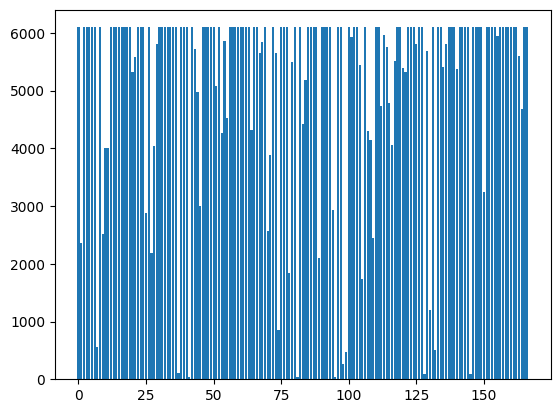

In [36]:
plt.bar(range(ibex_historical_data.shape[1]),ibex_historical_data.isnull().sum())
plt.bar(range(ibex_historical_data.shape[0]),ibex_historical_data.notna().sum(axis=1))

In [39]:
failed_loads = ibex_historical_data.columns[ibex_historical_data.isnull().values.all(axis=0)]
failed_loads, len(failed_loads)

(Index(['A3TV', 'ABG.P', 'ABG.P_1', 'ABG', 'ACE', 'ACR', 'ACX', 'AGR', 'AGS',
        'AGS_1',
        ...
        'UNF', 'URA', 'URB', 'VAL', 'VAL_1', 'VDR', 'VIS', 'VIS_1', 'ZEL',
        'ZOT'],
       dtype='object', length=103),
 103)